<a href="https://colab.research.google.com/github/22K61A4413/Sales-Price-Prediction-Analytics-Dashboard/blob/main/Sales_Price_Prediction_%26_Analytics_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: Install Required Packages

In [45]:
!pip install streamlit pyngrok scikit-learn pandas numpy matplotlib seaborn

STEP 2: Import Libraries & Load Dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (upload your CSV or use existing path)
data = pd.read_csv('/content/SuperMarket Analysis.csv')

# Show first few rows
print("Sample Data:")
print(data.head())

# Check missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Sample Data:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.141

STEP 3: Clean & Prepare Data

In [48]:
# Drop missing values
data = data.dropna()

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Encode categorical variables
data = pd.get_dummies(data, columns=['Product line', 'Gender', 'Branch'], drop_first=True)


STEP 4: Exploratory Data Analysis (Visualization)

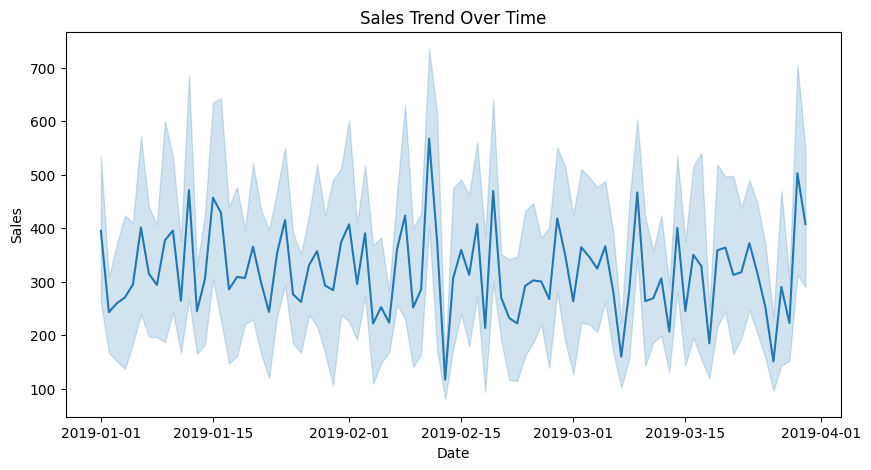

In [49]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Sales', data=data)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


STEP 5: Train Sales Prediction Model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select simple features
X = data[['Quantity', 'Unit price']]
y = data['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("✅ Model Trained Successfully")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


✅ Model Trained Successfully
MSE: 6228.045510688692
R2 Score: 0.9042708171993606


STEP 6: Create the Streamlit App

In [66]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import pickle

# Load dataset
data = pd.read_csv('/content/SuperMarket Analysis.csv')

# Page Title
st.title("📊 Sales Analytics Dashboard")

st.write("### Sales Data Overview")
st.dataframe(data.head())

# Prediction Input
st.write("### Predict Sales Amount")
quantity = st.number_input('Quantity', min_value=1, value=1)
unit_price = st.number_input('Unit Price', min_value=1.0, value=10.0)

# Load trained model
import joblib
model = joblib.load("sales_model.pkl")

# Prediction
features = np.array([[quantity, unit_price]])
predicted_sale = model.predict(features)
st.success(f"Predicted Sales: ₹{predicted_sale[0]:.2f}")

# Optional: show sales trend
data['Date'] = pd.to_datetime(data['Date'])
st.line_chart(data.set_index('Date')['Sales'])


Overwriting app.py


STEP 7: Save Your Model

In [67]:
import joblib
joblib.dump(model, "sales_model.pkl")
print("✅ Model saved successfully as sales_model.pkl")

✅ Model saved successfully as sales_model.pkl


STEP 8: Connect Streamlit to a Public URL

In [68]:
# Set your ngrok authentication token (one-time setup):

from pyngrok import ngrok
ngrok.set_auth_token("345YHqwg897i4MK7z0No0PE5qfX_2sQgWGWijH8nskroFwhiF")

In [69]:
!pkill streamlit
!pkill ngrok
!streamlit run app.py --server.port 8501 &>/dev/null&

from pyngrok import ngrok

# Run your app publicly:
public_url = ngrok.connect(8501)

print("✅ Streamlit app is running successfully!")
print("🔗 Click this link to open your app:")
print(public_url)


✅ Streamlit app is running successfully!
🔗 Click this link to open your app:
NgrokTunnel: "https://unjustifiably-warmthless-eleni.ngrok-free.dev" -> "http://localhost:8501"
